## **Problem Statement**

**Make a win predictor that displays the probability of the chasing team winning an IPL match after every over.**

**Import the required Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# dataset - https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set
# dataset - https://www.kaggle.com/datasets/xshahharsh/ipl-2022-ball-by-ball-dataset
# blog - https://towardsdatascience.com/task-cheatsheet-for-almost-every-machine-learning-project-d0946861c6d0


Read the Data of Matches from 2017

In [2]:
match_df = pd.read_csv('./matches.csv')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
match_df.shape

(756, 18)

In [5]:
match_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
print('Total Seasons:',len(match_df.Season.unique()))
print('Total Matches Played:',match_df.id.count())
print('Teams:',match_df.team1.unique())
print('Venues:',match_df.venue.unique())

Total Seasons: 12
Total Matches Played: 756
Teams: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
Venues: ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadiu

# **Important things to notice:**
*   There is no score in this file.
*   No data on current run rate, required run rate.

Let's read the second files of ball deliveries over by over(for first three overs)


In [8]:
dlvr_df = pd.read_csv('./deliveries.csv')
dlvr_df.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,6.0,S Dhawan,DA Warner,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,7.0,S Dhawan,DA Warner,TS Mills,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,1.0,S Dhawan,DA Warner,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,2.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,3.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [9]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31012 entries, 0 to 31011
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          31012 non-null  int64  
 1   inning            31012 non-null  int64  
 2   batting_team      31012 non-null  object 
 3   bowling_team      31012 non-null  object 
 4   over              31011 non-null  float64
 5   ball              31011 non-null  float64
 6   batsman           31011 non-null  object 
 7   non_striker       31011 non-null  object 
 8   bowler            31011 non-null  object 
 9   is_super_over     31011 non-null  float64
 10  wide_runs         31011 non-null  float64
 11  bye_runs          31011 non-null  float64
 12  legbye_runs       31011 non-null  float64
 13  noball_runs       31011 non-null  float64
 14  penalty_runs      31011 non-null  float64
 15  batsman_runs      31011 non-null  float64
 16  extra_runs        31011 non-null  float6

We'll have to calculate scores from the deliveries data and then add it to matches data.

# find how many stadium present in each cities


In [10]:
# find how many stadium present in each cities
city_venue = match_df.groupby(['city','venue']).count()['Season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

Season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

# **Total score in every inning in every match**

In [11]:
inn_score = dlvr_df.groupby(['match_id','inning']).sum()['total_runs']
inn_score

match_id  inning
1         1         207.0
          2         172.0
2         1         184.0
          2         187.0
3         1         183.0
                    ...  
132       1         187.0
          2          95.0
133       1         143.0
          2         147.0
134       1          23.0
Name: total_runs, Length: 271, dtype: float64

In [12]:
inn_score = dlvr_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

## we need only 1st innings score from here.
inn_score = inn_score[inn_score['inning'] == 1]
inn_score

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
262,130,1,139.0
264,131,1,165.0
266,132,1,187.0
268,133,1,143.0


# **Merge the match_df with inn_scores dataframe on id**

In [13]:
match_df = match_df.merge(inn_score[['match_id','total_runs']], left_on='id', right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,IPL-2009,Cape Town,26-04-2009,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan,NaN,130,139.0
130,131,IPL-2009,Durban,27-04-2009,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,HH Gibbs,Kingsmead,IL Howell,TH Wijewardene,NaN,131,165.0
131,132,IPL-2009,Port Elizabeth,27-04-2009,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,92,0,SR Tendulkar,St George's Park,BG Jerling,RB Tiffin,NaN,132,187.0
132,133,IPL-2009,Centurion,28-04-2009,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN,133,143.0


# **Clean up the dataframe**

*   Remove the duplicate teams.




In [14]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [15]:
teams = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

In [16]:
## using isin method to retain rows that are in the list above
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(106, 20)

# **Getting rid of Duckworth-Lewis Matches**

In [18]:
match_df['dl_applied'].unique()

array([0, 1])

In [19]:
match_df['result'].unique()

array(['normal', 'tie'], dtype=object)

In [20]:
## looking at DL matches
match_df[match_df['dl_applied'] == 1]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN,57,128.0
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN,100,118.0
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN,103,149.0
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN,120,104.0
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN,123,158.0


In [21]:
## filtering all the matches where D/L was not applied
match_df = match_df[match_df['dl_applied'] == 0]


In [22]:
match_df.shape

(101, 20)

In [23]:
## Filtering matches that doesn't have any result
match_df = match_df[match_df['result'] != 'no result']

In [24]:
match_df.shape

(101, 20)

In [25]:
#finally, we have 623 rows
#we initially had 756 rows 
print("{}% of data has been retained.".format(round((623/756)*100,2)))
print("{}% of data has been removed during preprocessing.".format(round(((756-623)/756)*100,2)))

82.41% of data has been retained.
17.59% of data has been removed during preprocessing.


# **Getting rid of redundant columns**

In [26]:
match_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs'],
      dtype='object')

In [27]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [28]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207.0
4,5,Bangalore,Royal Challengers Bangalore,157.0
6,7,Mumbai,Mumbai Indians,178.0
7,8,Indore,Kings XI Punjab,148.0
9,10,Mumbai,Mumbai Indians,158.0
...,...,...,...,...
129,130,Cape Town,Kings XI Punjab,139.0
130,131,Durban,Deccan Chargers,165.0
131,132,Port Elizabeth,Mumbai Indians,187.0
132,133,Centurion,Rajasthan Royals,143.0


# **Match status in the 2nd innings**


*   Using this 1st innings data and scores, we'll prepare the 2nd innings data that will be fed to the model.




In [29]:
dlvr_df = match_df.merge(dlvr_df, on="match_id")
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23594,134,Durban,Royal Challengers Bangalore,23.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,3.0,5.0,CH Gayle,...,0.0,0.0,0.0,0.0,0.0,5.0,5.0,NaN,NaN,NaN
23595,134,Durban,Royal Challengers Bangalore,23.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,3.0,6.0,CH Gayle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
23596,134,Durban,Royal Challengers Bangalore,23.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,3.0,7.0,CH Gayle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
23597,134,Durban,Royal Challengers Bangalore,23.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,4.0,1.0,BJ Hodge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [30]:
## filtering 2nd innings deliveries
dlvr_df = dlvr_df[dlvr_df['inning'] == 2]
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23572,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,18.0,5.0,YK Pathan,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
23573,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,18.0,6.0,YK Pathan,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
23574,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,19.0,1.0,YK Pathan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
23575,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,19.0,2.0,YK Pathan,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN


In [31]:
## score upto that delivery
dlvr_df['current_score'] = dlvr_df.groupby('match_id').cumsum()['total_runs_y']
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0


In [32]:
## runs left to score
dlvr_df['runs_left'] = dlvr_df['total_runs_x'] - dlvr_df['current_score']

In [33]:
## balls left
dlvr_df['balls_left'] = 120 - ((dlvr_df['over']-1)*6 + dlvr_df['ball'])
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115.0


# **Wickets**

In [34]:
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].fillna("0")
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].astype('int')
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0


In [35]:
wkts = dlvr_df.groupby(['match_id']).cumsum()['player_dismissed'].values

In [36]:
dlvr_df['wickets'] = 10 - wkts
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10


In [37]:
## calculating current run rate = runs/overs
dlvr_df['crr'] = (dlvr_df['current_score']*6) / (120 - dlvr_df['balls_left'])

In [38]:
##required run rate  = runs left / overs left
dlvr_df['rrr'] = (dlvr_df['runs_left']*6) / dlvr_df['balls_left']

In [39]:
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0,NaN,NaN,1.0,206.0,119.0,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0,NaN,NaN,1.0,206.0,118.0,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0,NaN,NaN,1.0,206.0,117.0,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0,NaN,NaN,3.0,204.0,116.0,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0,NaN,NaN,7.0,200.0,115.0,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23572,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,18.0,5.0,YK Pathan,...,6.0,0,NaN,NaN,140.0,3.0,13.0,5,7.850467,1.384615
23573,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,18.0,6.0,YK Pathan,...,1.0,0,NaN,NaN,141.0,2.0,12.0,5,7.833333,1.000000
23574,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,19.0,1.0,YK Pathan,...,0.0,0,NaN,NaN,141.0,2.0,11.0,5,7.761468,1.090909
23575,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,19.0,2.0,YK Pathan,...,2.0,0,NaN,NaN,143.0,0.0,10.0,5,7.800000,0.000000


# **Did the team batting in the 2nd innings win or not?**

In [40]:
def match_result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

## adding chasing team results in the result column ==> 0 -> loss, 1 -> win
dlvr_df['result'] = dlvr_df.apply(match_result ,axis=1)

In [41]:
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0,NaN,NaN,1.0,206.0,119.0,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0,NaN,NaN,1.0,206.0,118.0,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0,NaN,NaN,1.0,206.0,117.0,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0,NaN,NaN,3.0,204.0,116.0,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0,NaN,NaN,7.0,200.0,115.0,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23572,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,18.0,5.0,YK Pathan,...,0,NaN,NaN,140.0,3.0,13.0,5,7.850467,1.384615,1
23573,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,18.0,6.0,YK Pathan,...,0,NaN,NaN,141.0,2.0,12.0,5,7.833333,1.000000,1
23574,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,19.0,1.0,YK Pathan,...,0,NaN,NaN,141.0,2.0,11.0,5,7.761468,1.090909,1
23575,133,Centurion,Rajasthan Royals,143.0,2,Rajasthan Royals,Delhi Daredevils,19.0,2.0,YK Pathan,...,0,NaN,NaN,143.0,0.0,10.0,5,7.800000,0.000000,1


# **Cleaning the final dataframe**

In [42]:
final_df = dlvr_df[['batting_team','bowling_team','city','runs_left',\
                    'balls_left','wickets','total_runs_x','crr','rrr','result']]

In [43]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,119.0,10,207.0,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,118.0,10,207.0,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,117.0,10,207.0,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204.0,116.0,10,207.0,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200.0,115.0,10,207.0,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
23572,Rajasthan Royals,Delhi Daredevils,Centurion,3.0,13.0,5,143.0,7.850467,1.384615,1
23573,Rajasthan Royals,Delhi Daredevils,Centurion,2.0,12.0,5,143.0,7.833333,1.000000,1
23574,Rajasthan Royals,Delhi Daredevils,Centurion,2.0,11.0,5,143.0,7.761468,1.090909,1
23575,Rajasthan Royals,Delhi Daredevils,Centurion,0.0,10.0,5,143.0,7.800000,0.000000,1


In [44]:
final_df.dropna(inplace=True)

In [45]:
final_df = final_df[final_df['balls_left'] != 0]

In [46]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,119.0,10,207.0,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,118.0,10,207.0,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206.0,117.0,10,207.0,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204.0,116.0,10,207.0,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200.0,115.0,10,207.0,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
23572,Rajasthan Royals,Delhi Daredevils,Centurion,3.0,13.0,5,143.0,7.850467,1.384615,1
23573,Rajasthan Royals,Delhi Daredevils,Centurion,2.0,12.0,5,143.0,7.833333,1.000000,1
23574,Rajasthan Royals,Delhi Daredevils,Centurion,2.0,11.0,5,143.0,7.761468,1.090909,1
23575,Rajasthan Royals,Delhi Daredevils,Centurion,0.0,10.0,5,143.0,7.800000,0.000000,1


# **Segregating the features from the target variable**

In [47]:
## X is for features and Y is for target Variable - win
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

# **Splitting the dataset into training and testing with 20% data reserved for testing.**

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((8968, 9), (2242, 9), (8968,), (2242,))

In [50]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
18010,Kings XI Punjab,Deccan Chargers,Chandigarh,58.0,45.0,9,175.0,9.360000,7.733333
16839,Deccan Chargers,Mumbai Indians,Hyderabad,42.0,16.0,5,178.0,7.846154,15.750000
2111,Kings XI Punjab,Delhi Daredevils,Delhi,130.0,64.0,7,188.0,6.214286,12.187500
12696,Rajasthan Royals,Chennai Super Kings,Jaipur,34.0,65.0,10,109.0,8.181818,3.138462
11967,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,112.0,74.0,8,165.0,6.913043,9.081081
...,...,...,...,...,...,...,...,...,...
16566,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,124.0,37.0,3,197.0,5.277108,20.108108
23076,Deccan Chargers,Chennai Super Kings,Durban,54.0,43.0,8,165.0,8.649351,7.534884
1912,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,43.0,15.0,4,172.0,7.371429,17.200000
11032,Royal Challengers Bangalore,Delhi Daredevils,Delhi,58.0,31.0,7,191.0,8.966292,11.225806


In [51]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
18247,Delhi Daredevils,Mumbai Indians,Delhi,87.0,55.0,6,176.0,8.215385,9.490909
18938,Kolkata Knight Riders,Kings XI Punjab,Kolkata,150.0,102.0,10,174.0,8.000000,8.823529
16187,Deccan Chargers,Delhi Daredevils,Delhi,64.0,28.0,6,194.0,8.478261,13.714286
19680,Delhi Daredevils,Rajasthan Royals,Mumbai,180.0,108.0,9,192.0,6.000000,10.000000
2665,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,7.0,4.0,1,159.0,7.862069,10.500000
...,...,...,...,...,...,...,...,...,...
7877,Royal Challengers Bangalore,Mumbai Indians,Mumbai,141.0,99.0,10,165.0,6.857143,8.545455
15873,Rajasthan Royals,Kings XI Punjab,Chandigarh,193.0,95.0,9,221.0,6.720000,12.189474
2645,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,32.0,23.0,4,159.0,7.855670,8.347826
22746,Rajasthan Royals,Kings XI Punjab,Cape Town,137.0,118.0,10,139.0,6.000000,6.966102


In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8968 entries, 18010 to 484
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   batting_team  8968 non-null   object 
 1   bowling_team  8968 non-null   object 
 2   city          8968 non-null   object 
 3   runs_left     8968 non-null   float64
 4   balls_left    8968 non-null   float64
 5   wickets       8968 non-null   int64  
 6   total_runs_x  8968 non-null   float64
 7   crr           8968 non-null   float64
 8   rrr           8968 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 700.6+ KB


In [53]:
X_train[-1:]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
484,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,20.0,11.0,3,157.0,7.541284,10.909091


# **Can a machine understand what Rajasthan Royal or Cape Town is?**
Need to take care of the categorical variables - types of categorical variables.

# **Data preparation for model training**


*   Transform columns
*   One hot encode the categorical column




In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

col_trf = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse=False,drop='first'), ['batting_team','bowling_team','city'])
]
,remainder='passthrough')

## **Which model to use?**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [56]:
model_pipe = Pipeline(steps=[
    ('step1',col_trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [57]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [58]:
y_pred = model_pipe.predict(X_test)

In [59]:
model_pipe.predict_proba(X_train[:1])

array([[0.01855429, 0.98144571]])

**Testing the accuracy of the model**

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print("The Logistic Regression model delivers an {} % accuracy in the predictions.".format(round((accuracy_score(y_test, y_pred)*100),2)))

#model_pipe.score(X_test,y_test)

0.8867082961641392
The Logistic Regression model delivers an 88.67 % accuracy in the predictions.


**But we need probabilities**

In [61]:
model_pipe.predict_proba(X_test)[10]

array([0.44189628, 0.55810372])

In [62]:
def win_prob_calc(match_data, match_id, model):
    """
    At every delivery, the model will calculate the probability
    for the chasing team.
    """
    
    match = match_data[match_data['match_id'] == match_id]
    
    ## Match between teams
    print(f"Match: {match['batting_team'].iloc[0]} vs {match['bowling_team'].iloc[0]}")
    
    # converting ball by ball data to over by over data
    match = match[(match['ball'] == 6)]
    
    # get all the required columns in a copy dataframe
    copy_df = match[['batting_team','bowling_team','city','runs_left',\
                     'balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    
    # get rows where balls left are not zero - avoiding division by zero error
    copy_df = copy_df[copy_df['balls_left'] != 0]
    
    # calculate probability using the model
    result = model.predict_proba(copy_df)
    
    ## calculating percentage chance(prob multiplied by 100) for each team
    copy_df['lose'] = np.round(result.T[0]*100,1)
    copy_df['win'] = np.round(result.T[1]*100,1)
    
    # end of over 
    copy_df['end_of_over'] = range(1, copy_df.shape[0]+1)
    
    
    target = copy_df['total_runs_x'].values[0]
    print("Target:", target)
    
    # calculate runs left
    runs = list(copy_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    
    copy_df['runs_in_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(copy_df['wickets'].values)
    
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    
    # 
    w = np.array(wickets)
    nw = np.array(new_wickets)
    
    copy_df['wickets_in_over'] = (nw - w)[0:copy_df.shape[0]]
    
    copy_df = copy_df[['end_of_over','runs_in_over','wickets_in_over','lose','win']]
    
    # chasing team win probability
    print(f"Win probability for {match['batting_team'].iloc[0]}")
    
    return copy_df, target

In [63]:
out_df, target = win_prob_calc(dlvr_df, 80, model_pipe)
out_df

Match: Royal Challengers Bangalore vs Deccan Chargers
Target: 165.0
Win probability for Royal Challengers Bangalore


,end_of_over,runs_in_over,wickets_in_over,lose,win
11927,1,10.0,0,30.7,69.3
11933,2,6.0,0,30.8,69.2
11939,3,8.0,1,47.1,52.9
11945,4,6.0,0,44.3,55.7
11951,5,6.0,0,41.2,58.8
11957,6,7.0,0,36.2,63.8
11963,7,3.0,1,62.1,37.9
11969,8,7.0,0,57.0,43.0
11975,9,5.0,0,55.4,44.6
11981,10,3.0,0,57.5,42.5


**Plotting the probabilities with runs**

Text(0.5, 1.0, 'Target Score:165.0')

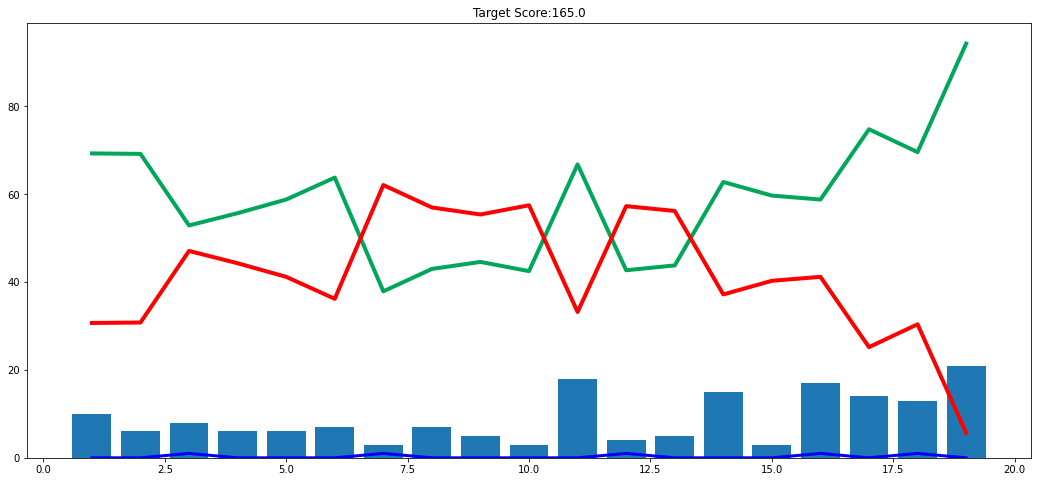

In [64]:
#plot for the match
#mark legend red lose prob green win prob

plt.figure(figsize=(18,8))
plt.plot(out_df['end_of_over'],out_df['wickets_in_over'],color='blue',linewidth=3)
plt.plot(out_df['end_of_over'],out_df['win'],color='#00a65a',linewidth=4)
plt.plot(out_df['end_of_over'],out_df['lose'],color='red',linewidth=4)
plt.bar(out_df['end_of_over'],out_df['runs_in_over'])
plt.title('Target Score:' + str(target))

In [65]:
#pipe of object to pkl
import pickle
pickle.dump(model_pipe,open('predpipe.pkl','wb'))